In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple = yf.download("AAPL", start='1991-01-01')

/var/folders/tm/tf6jjl7538vd6nlxbkfgphkw0000gn/T/ipykernel_77236/466817180.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start='1991-01-01')
[*********************100%***********************]  1 of 1 completed


In [3]:
data=apple.loc[(apple.index>='1991-01-01')]

In [4]:
data = data[['Close']]
data

Price,Close
Ticker,AAPL
Date,
1991-01-02,0.309167
1991-01-03,0.305614
1991-01-04,0.307390
1991-01-07,0.307390
1991-01-08,0.307390
...,...
2025-07-21,212.479996
2025-07-22,214.399994


In [5]:
sma_s=50
sma_l=100

In [6]:
data["sma_s"]=data["Close"]["AAPL"].rolling(sma_s).mean()
data["sma_l"]=data["Close"]["AAPL"].rolling(sma_l).mean()

In [7]:
data

Price,Close,sma_s,sma_l
Ticker,AAPL,,
Date,,,
1991-01-02,0.309167,NaN,NaN
1991-01-03,0.305614,NaN,NaN
1991-01-04,0.307390,NaN,NaN
1991-01-07,0.307390,NaN,NaN
1991-01-08,0.307390,NaN,NaN
...,...,...,...
2025-07-21,212.479996,204.664827,208.527555
2025-07-22,214.399994,205.008200,208.271103


<Axes: title={'center': 'AAPLE - SMA50 | SMA100'}, xlabel='Date'>

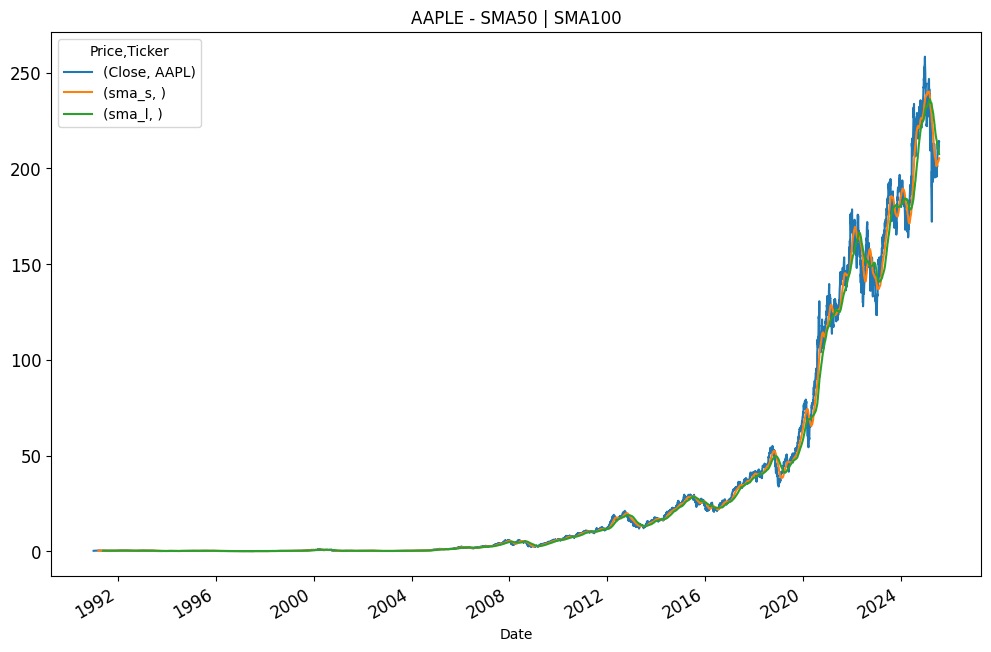

In [8]:
data.plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)

<Axes: title={'center': 'AAPLE - SMA50 | SMA100'}, xlabel='Date'>

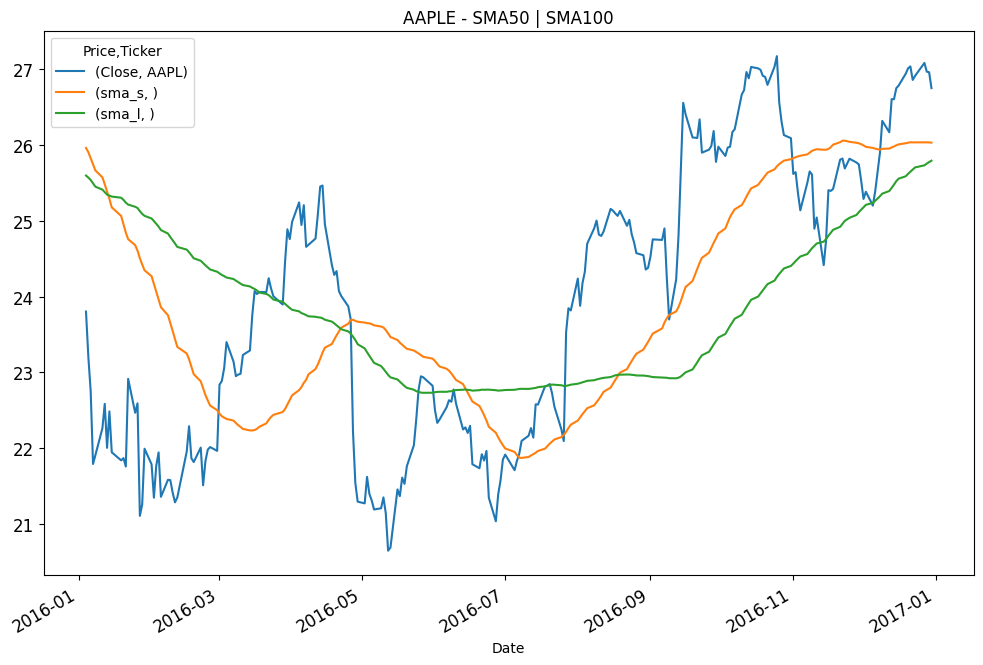

In [9]:
data.loc["2016"].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)

In [10]:
data.dropna(inplace=True)

In [11]:
data

Price,Close,sma_s,sma_l
Ticker,AAPL,,
Date,,,
1991-05-23,0.322214,0.426368,0.409260
1991-05-24,0.327569,0.423625,0.409444
1991-05-28,0.328461,0.420757,0.409673
1991-05-29,0.335602,0.417818,0.409955
1991-05-30,0.340064,0.414720,0.410281
...,...,...,...
2025-07-21,212.479996,204.664827,208.527555
2025-07-22,214.399994,205.008200,208.271103


In [12]:
data["position"] = np.where(data["sma_s"]>data["sma_l"],1,-1)

In [13]:
data

Price,Close,sma_s,sma_l,position
Ticker,AAPL,,,
Date,,,,
1991-05-23,0.322214,0.426368,0.409260,1
1991-05-24,0.327569,0.423625,0.409444,1
1991-05-28,0.328461,0.420757,0.409673,1
1991-05-29,0.335602,0.417818,0.409955,1
1991-05-30,0.340064,0.414720,0.410281,1
...,...,...,...,...
2025-07-21,212.479996,204.664827,208.527555,-1
2025-07-22,214.399994,205.008200,208.271103,-1


<Axes: title={'center': 'AAPLE - SMA50 | SMA100'}, xlabel='Date'>

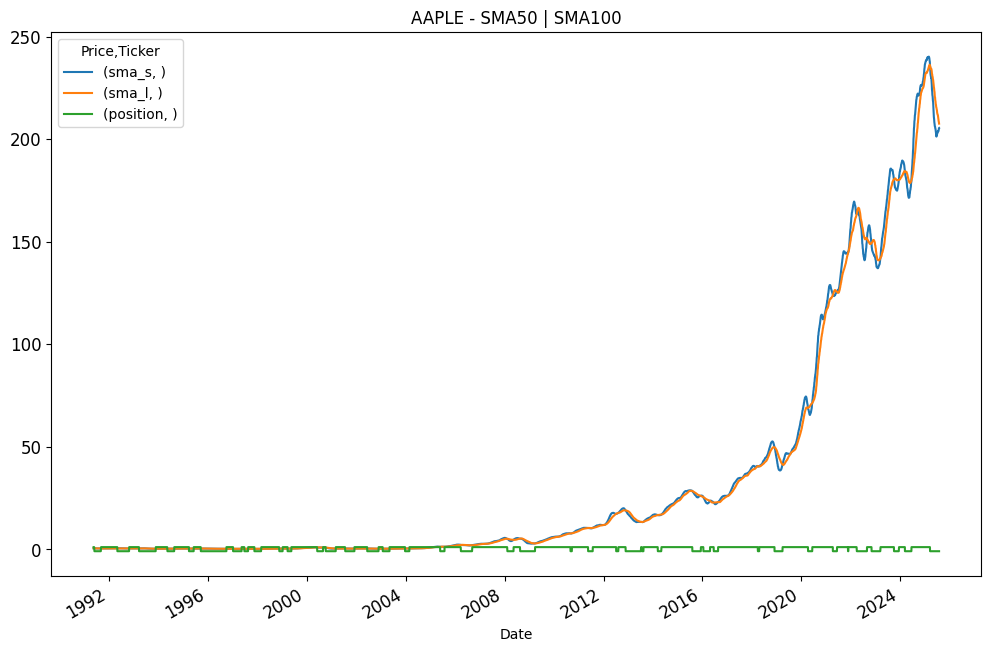

In [14]:
data.loc[:,["sma_s","sma_l","position"]].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)

<Axes: title={'center': 'AAPLE - SMA50 | SMA100'}, xlabel='Date'>

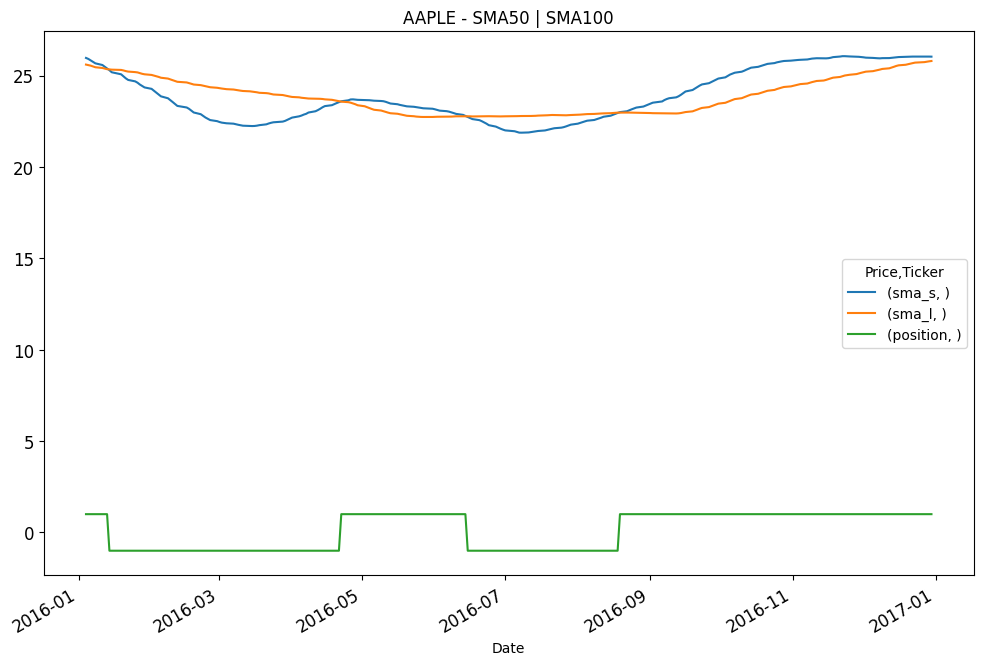

In [26]:
data.loc["2016",["sma_s","sma_l","position"]].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12, secondary_y="position")

In [27]:
data["returnsb&h"]=np.log(data["Close"]["AAPL"].div(data["Close"]["AAPL"].shift(1)))

In [29]:
data["strategy"]=data["returnsb&h"]*data.position.shift(1)

In [30]:
data

Price,Close,sma_s,sma_l,position,returnsb&h,strategy
Ticker,AAPL,,,,,
Date,,,,,,
1991-05-23,0.322214,0.426368,0.409260,1,NaN,NaN
1991-05-24,0.327569,0.423625,0.409444,1,0.016483,0.016483
1991-05-28,0.328461,0.420757,0.409673,1,0.002721,0.002721
1991-05-29,0.335602,0.417818,0.409955,1,0.021507,0.021507
1991-05-30,0.340064,0.414720,0.410281,1,0.013209,0.013209
...,...,...,...,...,...,...
2025-07-21,212.479996,204.664827,208.527555,-1,0.006137,-0.006137
2025-07-22,214.399994,205.008200,208.271103,-1,0.008996,-0.008996


In [31]:
data.dropna(inplace=True)

In [32]:
data[["returnsb&h","strategy"]].sum()

Price       Ticker
returnsb&h            6.497956
strategy              1.552060
dtype: float64

In [33]:
data[["returnsb&h","strategy"]].sum().apply(np.exp)

Price       Ticker
returnsb&h            663.783253
strategy                4.721185
dtype: float64

In [34]:
data[["returnsb&h","strategy"]].std()*np.sqrt(252)

Price       Ticker
returnsb&h            0.429392
strategy              0.429550
dtype: float64

<Axes: xlabel='Date'>

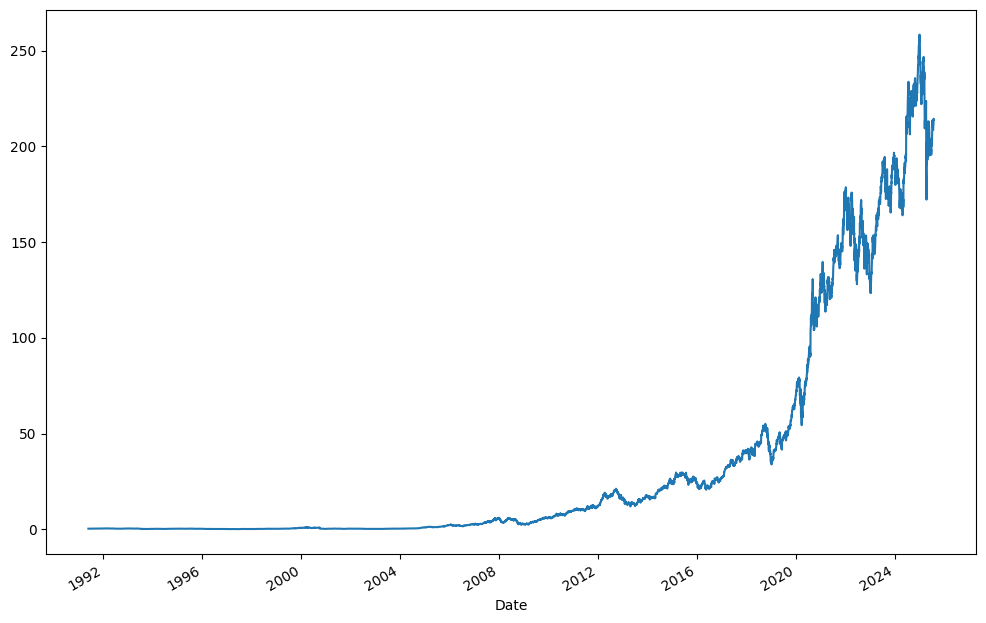

In [36]:
data["Close"]["AAPL"].plot(figsize=(12,8))

In [37]:
data["position2"] = np.where(data["sma_s"]>data["sma_l"],1,0)

In [38]:
data["strategy2"]=data["returnsb&h"]*data.position2.shift(1)

In [40]:
data.dropna(inplace=True)

In [41]:
data[["returnsb&h","strategy2"]].sum()

Price       Ticker
returnsb&h            6.481473
strategy2             4.008525
dtype: float64

In [42]:
data[["returnsb&h","strategy2"]].sum().apply(np.exp)

Price       Ticker
returnsb&h            652.931969
strategy2              55.065593
dtype: float64

In [43]:
data[["returnsb&h","strategy2"]].std()*np.sqrt(252)

Price       Ticker
returnsb&h            0.429409
strategy2             0.330999
dtype: float64

In [ ]:
data[["strategy","strategy2"]].std()*np.sqrt(252)